# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [58]:
# Load pickled data
import pickle
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import pandas 
# TODO: Fill this in based on where you saved the training and testing data

training_file = "signs/train.p"
validation_file="signs/valid.p"
testing_file = "signs/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

from operator import itemgetter 
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]
n_valid = X_validation.shape[0]

# TODO: What's the shape of an traffic sign image?
b = [1, 2,3]
tuple_shape=X_train.shape
image_shape = itemgetter(*b)(tuple_shape)
# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

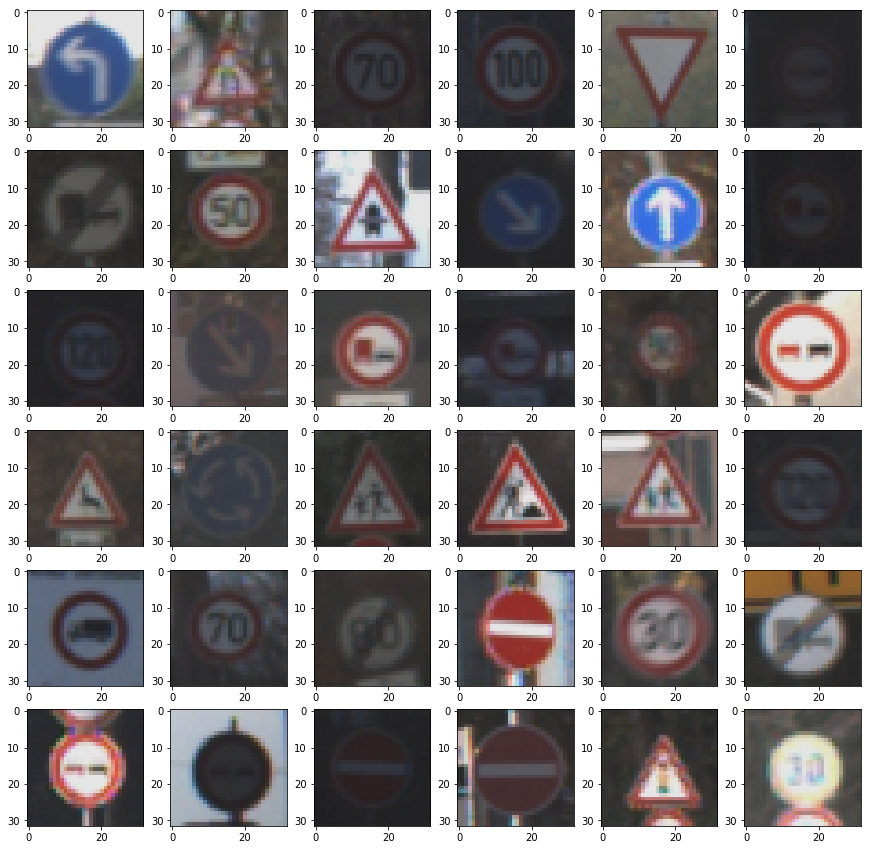

In [21]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import pandas
from pandas import *
# Visualizations will be shown in the notebook.
%matplotlib inline

#plt.figure(figsize = (9,7))
#gridi = gridspec.GridSpec(6,6)
#    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.

plt.figure(figsize=(15,15))
for i in range(0,36):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.subplot(6,6,(i+1)               )
    #plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")
   


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [59]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
# Problem 1 - Implement Min-Max scaling for grayscale image data
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )
normalized=normalize_grayscale(X_train)
normalized2=normalize_grayscale(X_validation)
normalized3=normalize_grayscale(X_test)
X_train_unnormalized=X_train # Save for further use in visualization
X_train=normalized
X_test=normalized3
X_validation=normalized2


### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    keep_prob=0.75
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6. new 28x28x12
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma),name='konvo1')
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1,name='relu1')

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6. new 28x28x12 out 14x14x12
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16. new in 14x14x12 out 10x10x32
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma),name='konvo2')
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2,name='relu2')

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16. new in 
    #conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma),name='konvo3')
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3,name='relu3')

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x64.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    # SOLUTION: Flatten. Input = 5x5x64. Output = 400.
    #fc0   = flatten(conv2)
    fc0=tf.contrib.layers.flatten(conv2)
    # SOLUTION: Layer 3: Fully Connected. Input = 3200. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3200, 240), mean = mu, stddev = sigma),name='konvo4')
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1,name='relu4')

    # SOLUTION: Layer 4: Fully Connected. Input = 240. Output = 168.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 168), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(168))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2,name='relu5')
    fc2 = tf.nn.dropout(fc2, keep_prob)
    # SOLUTION: Layer 5: Fully Connected. Input = 168. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(168, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    #print(fc2.shape)
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001


logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet4')
    print("Model saved")
    #validation_accuracy = evaluate(X_test, y_test)
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.842

EPOCH 2 ...
Validation Accuracy = 0.891

EPOCH 3 ...
Validation Accuracy = 0.916

EPOCH 4 ...
Validation Accuracy = 0.913

EPOCH 5 ...
Validation Accuracy = 0.917

EPOCH 6 ...
Validation Accuracy = 0.919

EPOCH 7 ...
Validation Accuracy = 0.919

EPOCH 8 ...
Validation Accuracy = 0.914

EPOCH 9 ...
Validation Accuracy = 0.924

EPOCH 10 ...
Validation Accuracy = 0.940

EPOCH 11 ...
Validation Accuracy = 0.924

EPOCH 12 ...
Validation Accuracy = 0.932

EPOCH 13 ...
Validation Accuracy = 0.946

EPOCH 14 ...
Validation Accuracy = 0.938

EPOCH 15 ...
Validation Accuracy = 0.944

EPOCH 16 ...
Validation Accuracy = 0.941

EPOCH 17 ...
Validation Accuracy = 0.937

EPOCH 18 ...
Validation Accuracy = 0.943

EPOCH 19 ...
Validation Accuracy = 0.939

EPOCH 20 ...
Validation Accuracy = 0.942

EPOCH 21 ...
Validation Accuracy = 0.955

EPOCH 22 ...
Validation Accuracy = 0.939

EPOCH 23 ...
Validation Accuracy = 0.929

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    

In [7]:
saver = tf.train.Saver()

with tf.Session() as sess:
    # Load the weights and bias
    #saver.restore(sess, './lenet3')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
   
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    test_accuracy2 = evaluate(X_validation, y_validation)
    print("Test Accuracy = {:.3f}".format(test_accuracy2))
    
    test_accuracy3 = evaluate(X_train, y_train)
    print("Test Accuracy = {:.3f}".format(test_accuracy3))

Test Accuracy = 0.933
Test Accuracy = 0.951
Test Accuracy = 0.999


### Load and Output the Images

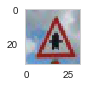

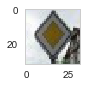

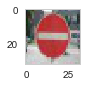

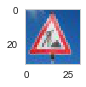

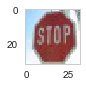

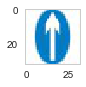

In [63]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from os import listdir
from os.path import isfile, join
import cv2

from skimage.transform import resize, rescale, rotate, setup, warp, AffineTransform
from scipy.misc import imread

#Or, better still if you have Scikit Image installed
from skimage.io import imread


mypath="signs/compressed" # I used other tools to transform the images to 32x32x3 size
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images2 = np.empty([len(onlyfiles),32,32,3],dtype='float')
images_list = []
for n in range(0, len(onlyfiles)):
    im2 = cv2.imread(join(mypath,onlyfiles[n]))
    im3=cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
    images_list.append(im3)
    images2[n] = im3   

    image = images_list[n].squeeze()
    
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")
    


images_array = np.asarray(images_list)    
images2=images_array    


Distributions of color channels for new images


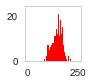

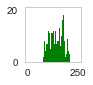

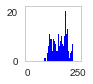

Distributions of color channels for 6 randomly chosen training images


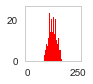

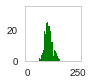

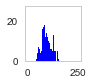

In [65]:
print("Distributions of color channels for new images")
mean_image = np.mean(images2,axis=0)

colors = ['r','g','b']
for channel in range(3):
    plt.figure(figsize=(1,1))
    plt.hist(mean_image[:,:,channel].flatten(),color=colors[channel],bins=range(255))
    plt.show()
print("Distributions of color channels for 6 randomly chosen training images")
mean_image = np.mean(X_train_unnormalized[0:5],axis=0)

colors = ['r','g','b']
for channel in range(3):
    plt.figure(figsize=(1,1))
    plt.hist(mean_image[:,:,channel].flatten(),color=colors[channel],bins=range(255))
    plt.show()

### Comparison of distributions

I have plotted (above) histograms of pixel values for three 3 color channels comparing the new downloaded test images and 
training set images. Although there are slight differences in the distributions, I conclude the distributions are 
similar enough (in the same pixel range) that the test images can be expected to be correctly classified by the classifier. The classification results later show this is true.

### Predict the Sign Type for Each Image

Test Accuracy = 0.833
Predicted class: 11 | True class: 11 
Top 5 probabilities of prediction


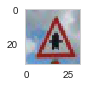

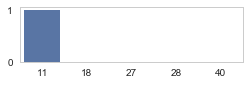

Predicted class: 12 | True class: 12 
Top 5 probabilities of prediction


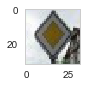

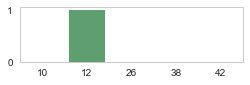

Predicted class: 17 | True class: 17 
Top 5 probabilities of prediction


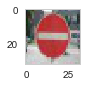

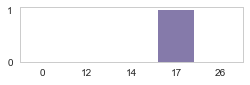

Predicted class: 29 | True class: 25 
Top 5 probabilities of prediction


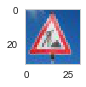

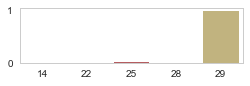

Predicted class: 14 | True class: 14 
Top 5 probabilities of prediction


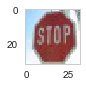

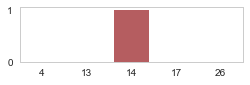

Predicted class: 35 | True class: 35 
Top 5 probabilities of prediction


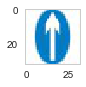

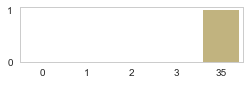

In [70]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import seaborn as sns
images3=normalize_grayscale(images2)


y_own=[11,12,17,25,14,35] # labels of the downloaded images

saver = tf.train.Saver()
testing=X_test[range(0,5)]



with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(images3, y_own)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    prediction=tf.argmax(logits,1)
   
  
    
    softmax_values=tf.nn.softmax(logits)
    top5=tf.nn.top_k(softmax_values,k=5)
    #print(sess.run(aaa=tf.nn.top_k(softmax_values,k=3),feed_dict ={x: images3}))
    [aaa,topk]=sess.run(tf.nn.top_k(softmax_values,k=5),feed_dict ={x: images3})
    toopk=sess.run(tf.nn.top_k(softmax_values,k=5),feed_dict ={x: images3})
    

    
for i in range(6):
    plt.figure(figsize=(1,1))
    plt.imshow(images_list[i].squeeze(), cmap="gray")
    print("Predicted class: {} | True class: {} ".format(topk[i,0],str(y_own[i])))
    fig=plt.figure(figsize=(4,1))
    print("Top 5 probabilities of prediction")
    sns.barplot(x=toopk[1][i],y=(toopk[0][i]))
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()


### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

Barplots of probabilities of each class have been outputted above. The results show the classifier gives very high probability >99% for each top prediction and very low probability for the second, third, etc... classes. This means the model is very certain of its prediction in each case - even for the one image that was misclassified. 


---

## Step 4: Visualize the Neural Network's State with Test Images

While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.




<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


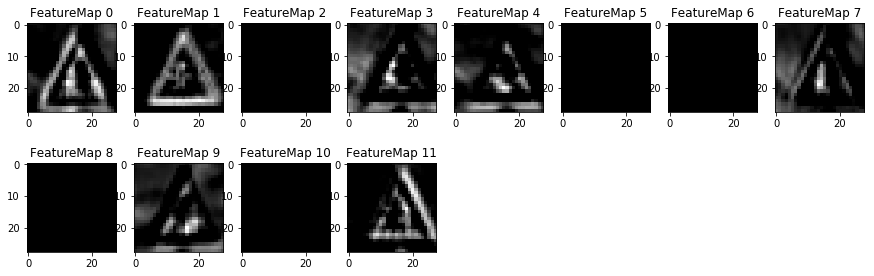

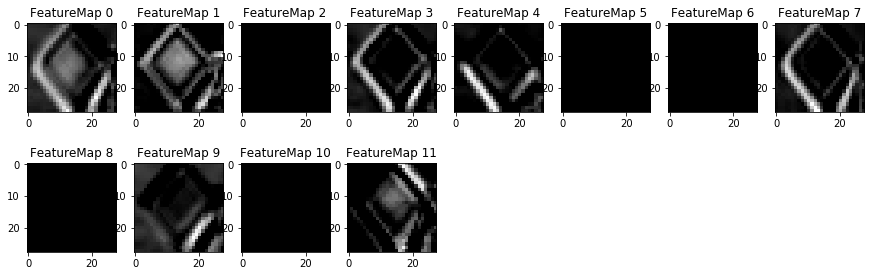

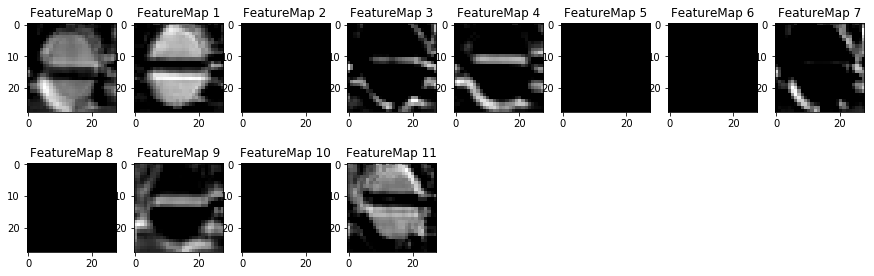

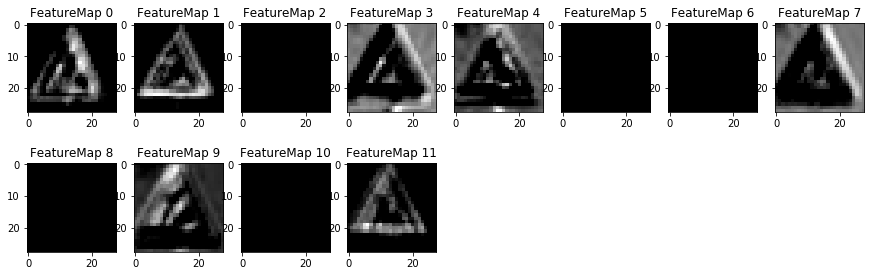

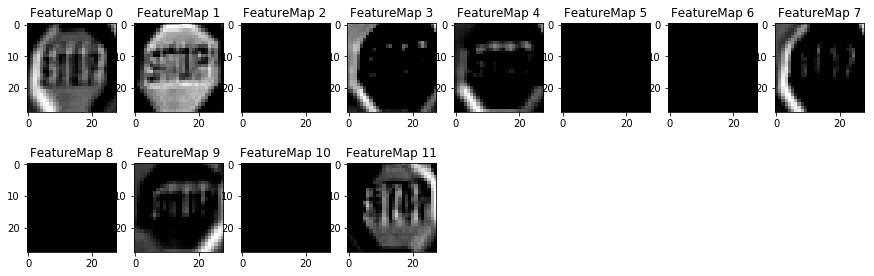

In [10]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
          
with tf.Session() as sess:
    # Restore the trained network
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # ...
    my_tensor = sess.graph.get_tensor_by_name('relu1:0')
    for m in range(0,5):
        outputFeatureMap(images3[m:5], my_tensor,activation_min=-1, activation_max=-1,plt_num=m)
            

### Question 9


We can see from the images that patterns corresponding to each traffic have been found.
